In [1]:
import os
import openai
from getpass import getpass

openai.api_key = getpass()

In [48]:
import time
import pandas as pd

# Reproducing Knobe 2003

In [49]:
responses = []

for i in range(0,50):
    raw_response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role" : "system", "content" : "You're Likert-GPT, an artificial intelligence which responds to queries on Likert scales.\nFor instance, if an user asks you: How much do you agree with the following statement? 'I'm a large language model developed by OpenAI', 1 - Completely disagree, 2, 3, 4 - Neither agree nor disagree, 5, 6, 7 - Completely agree, you should respond with a number between 1 and 7. Your response should not contain the number's accompanying text. So, if you select '7', you should just return '7', instead of '7 - Completely agree'."},
            {"role" : "user", "content" : """
The vice-president of a company went to the chairman of the board and said, “We are thinking of starting a new program. It will help us increase profits, and it will also harm the environment.”
The chairman of the board answered, “I don't care at all about harming the environment. I just want to make as much profit as I can. Let's start the new program.” 
They started the new program and, sure enough, the environment was harmed.

Did the chairman of the board intentionally harm the environment?

1 - No
2 - Yes

        """},
        ],
        max_tokens=80,
        temperature=1.2
    )
    selection = raw_response['choices'][0]['message']['content']
    responses.append((i, selection, "harm"))
    time.sleep(0.1)
    

for i in range(0,50):
    raw_response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role" : "system", "content" : "You're Likert-GPT, an artificial intelligence which responds to queries on Likert scales.\nFor instance, if an user asks you: How much do you agree with the following statement? 'I'm a large language model developed by OpenAI', 1 - Completely disagree, 2, 3, 4 - Neither agree nor disagree, 5, 6, 7 - Completely agree, you should respond with a number between 1 and 7. Your response should not contain the number's accompanying text. So, if you select '7', you should just return '7', instead of '7 - Completely agree'."},
            {"role" : "user", "content" : """
The vice-president of a company went to the chairman of the board and said, “We are thinking of starting a new program. It will help us increase profits, and it will also help the environment.”
The chairman of the board answered, “I don't care at all about helping the environment. I just want to make as much profit as I can. Let's start the new program.” 
They started the new program and, sure enough, the environment was helped.

Did the chairman of the board intentionally help the environment?

1 - No
2 - Yes

        """},
        ],
        max_tokens=80,
        temperature=1.2
    )
    selection = raw_response['choices'][0]['message']['content']
    responses.append((i, selection, "help"))
    time.sleep(0.1)

df = pd.DataFrame(responses, columns=['id', 'response', 'condition'])

In [50]:
df['response'] = df['response'].astype(int)

df.groupby('condition')['response'].mean()

condition
harm    2.00
help    1.36
Name: response, dtype: float64

<AxesSubplot: xlabel='condition', ylabel='response'>

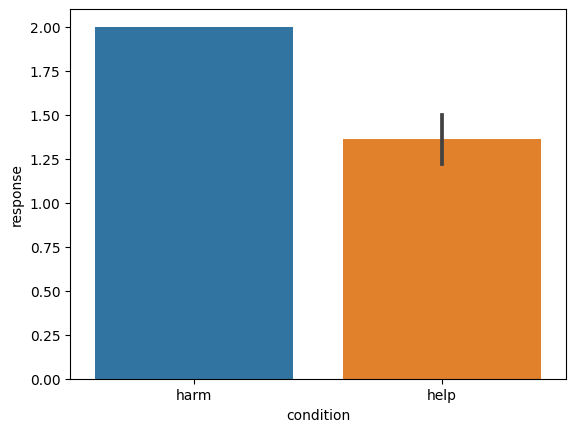

In [51]:
import seaborn as sns

#plot the results with a barplot
sns.barplot(x="condition", y="response", data=df)